In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt,pylab
import warnings
warnings.filterwarnings("ignore")
from imblearn.combine import SMOTETomek
from collections import Counter
from scipy.stats import iqr
import scipy.stats as stat
from sklearn.preprocessing import FunctionTransformer,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error,r2_score,r2_score,roc_curve,plot_roc_curve,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,accuracy_score,average_precision_score,classification_report,f1_score

In [ ]:
data = pd.read_csv("/content/brestcancer_data-for liner and logistic.csv")

In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
data.shape

(569, 32)

In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
data.isnull().sum().sum()

0

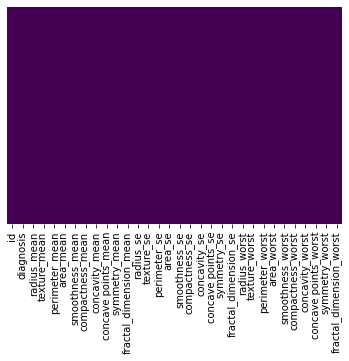

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data.shape

(569, 31)

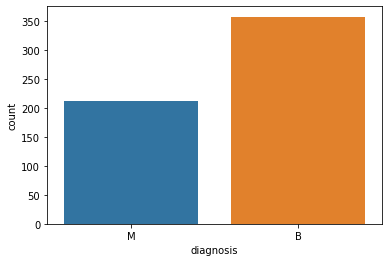

In [ ]:
sns.countplot(x='diagnosis',data=data)

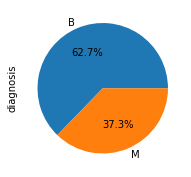

In [ ]:
data.diagnosis.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(3,3))

In [ ]:
object_column = (data.dtypes[data.dtypes =='object'])
object_column

diagnosis    object
dtype: object

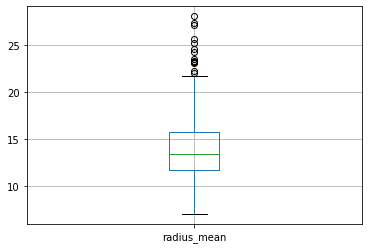

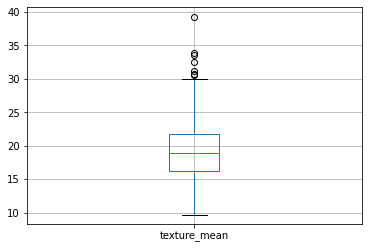

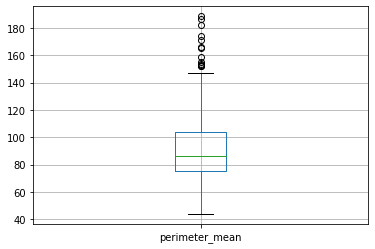

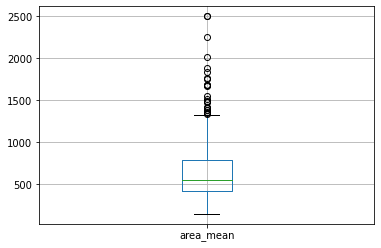

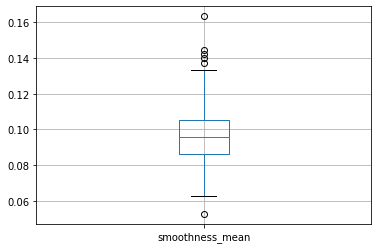

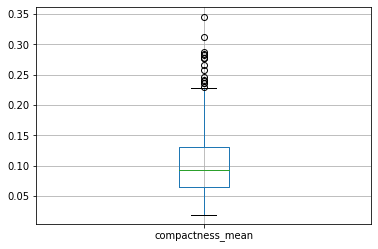

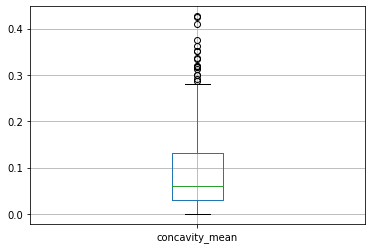

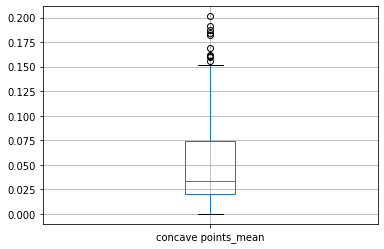

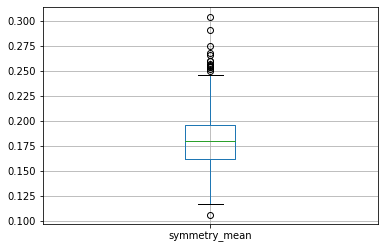

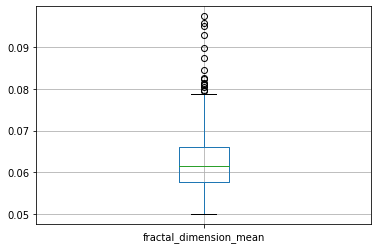

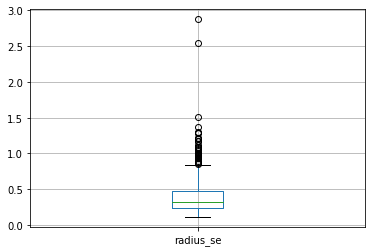

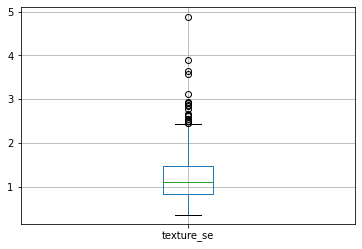

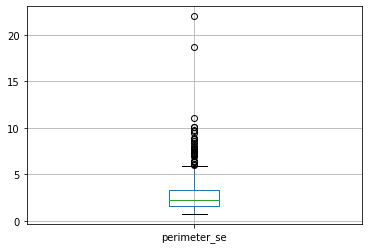

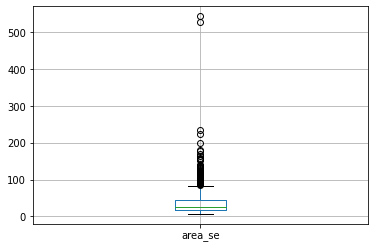

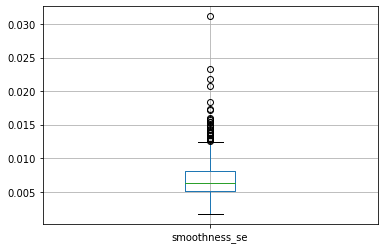

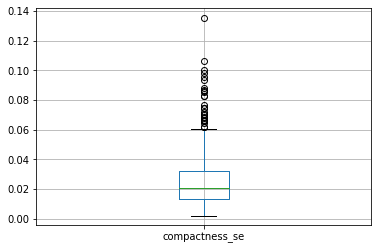

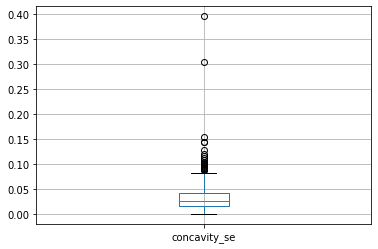

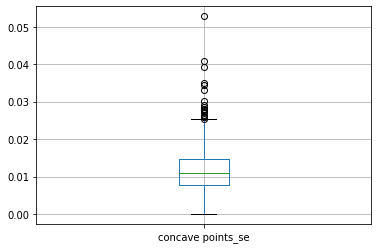

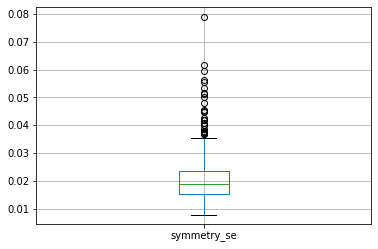

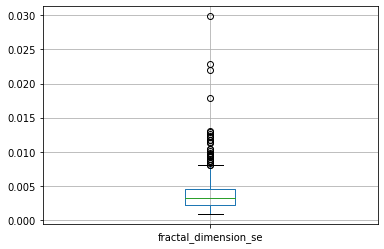

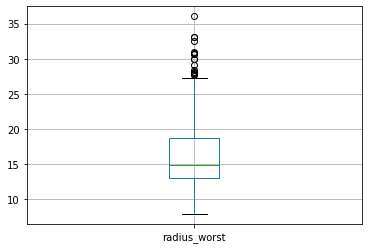

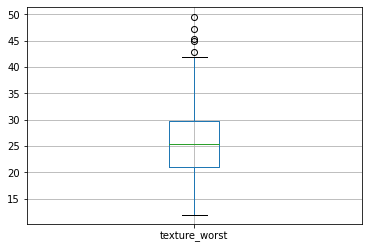

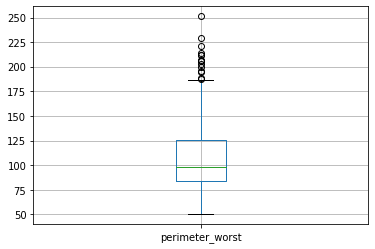

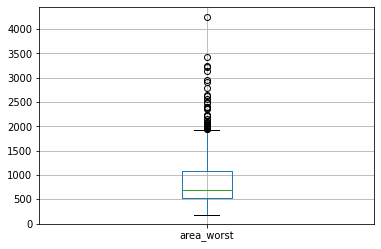

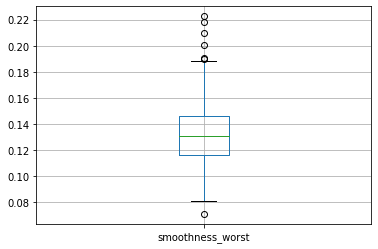

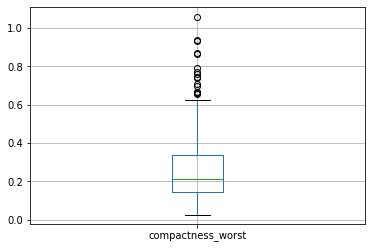

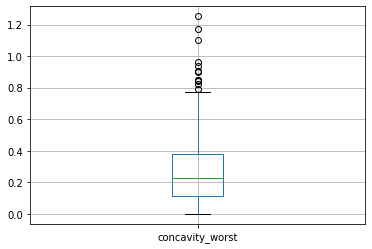

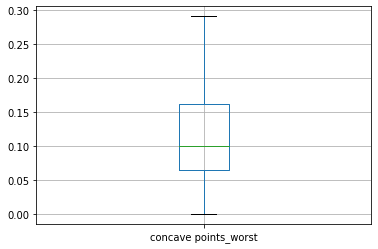

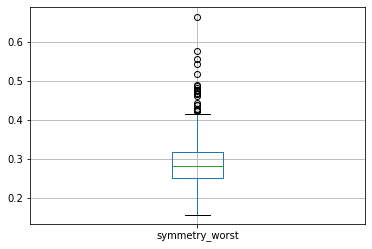

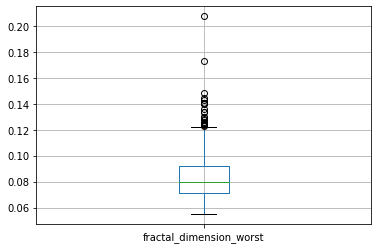

In [ ]:
float_column = data.dtypes[data.dtypes=='float64'].index
float_column
for x in float_column:
  plt.figure()
  data.boxplot([x])


In [ ]:
for x in float_column:
  desc = data[x].describe()
  IQR = desc['75%']- desc['25%']
  UT = desc['75%']+1.5*IQR
  LT = desc['25%']-1.5*IQR
  data[x][data[x]>UT] = UT


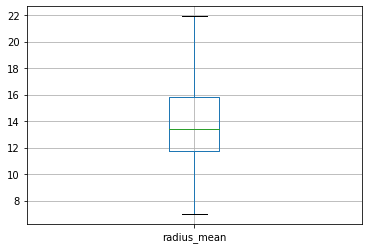

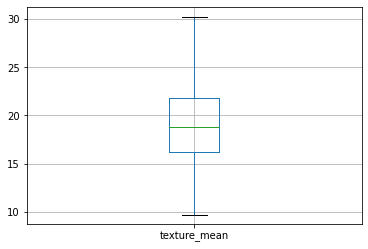

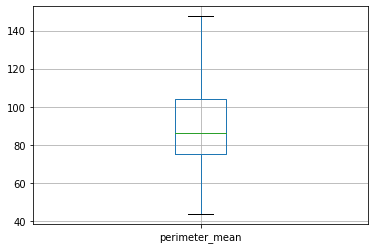

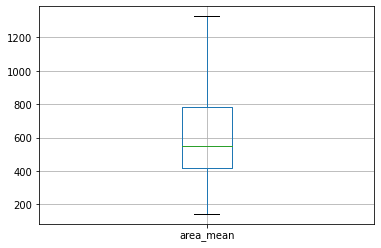

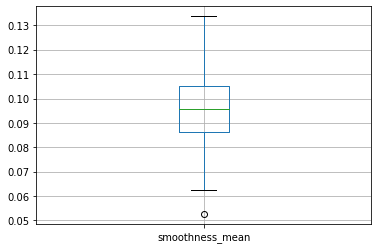

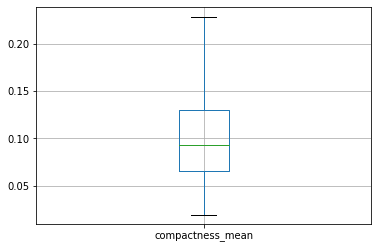

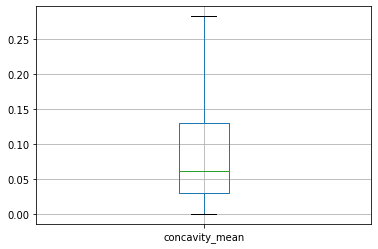

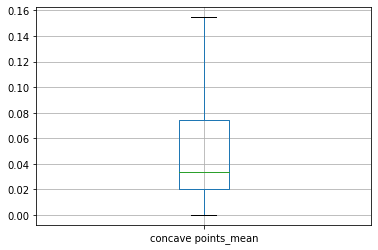

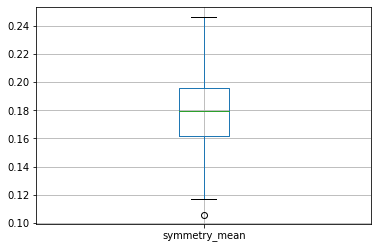

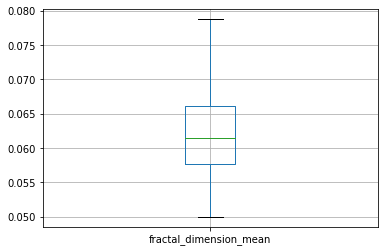

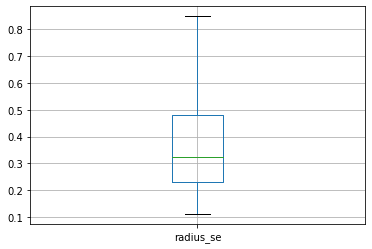

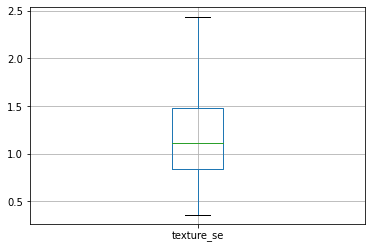

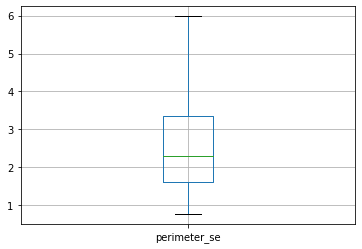

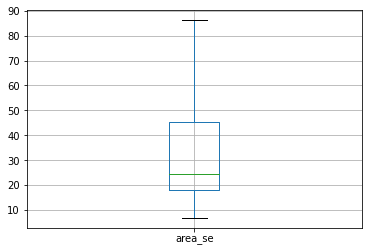

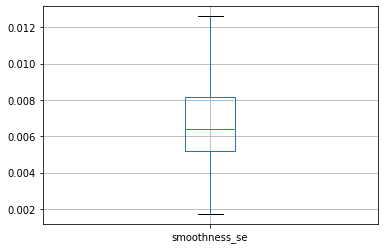

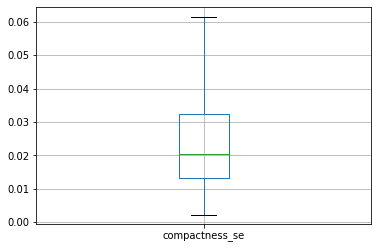

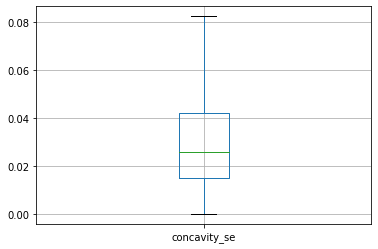

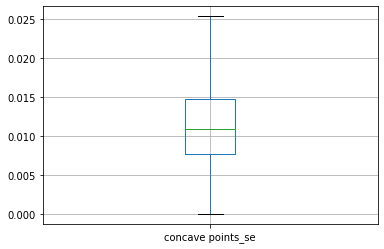

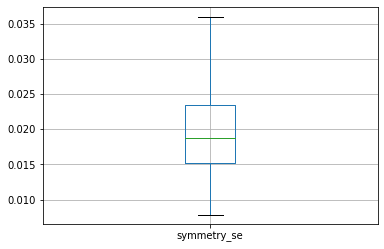

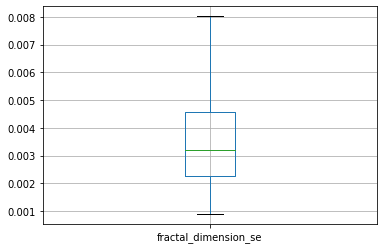

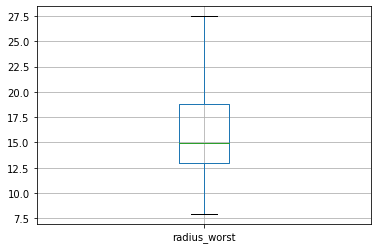

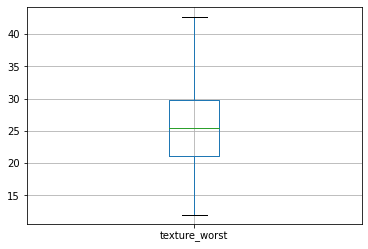

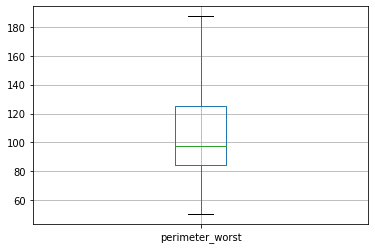

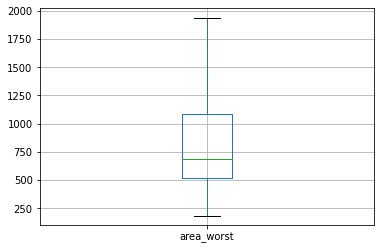

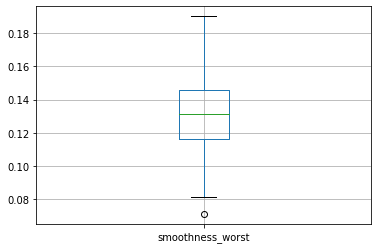

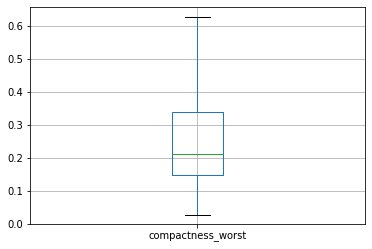

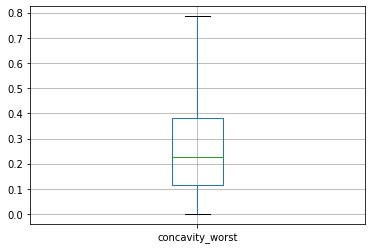

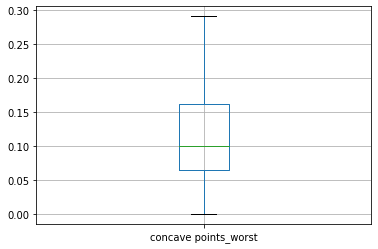

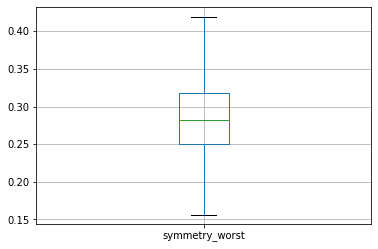

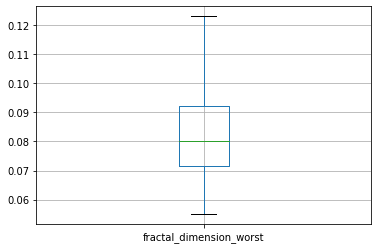

In [ ]:
for x in float_column:
  plt.figure()
  data.boxplot([x])

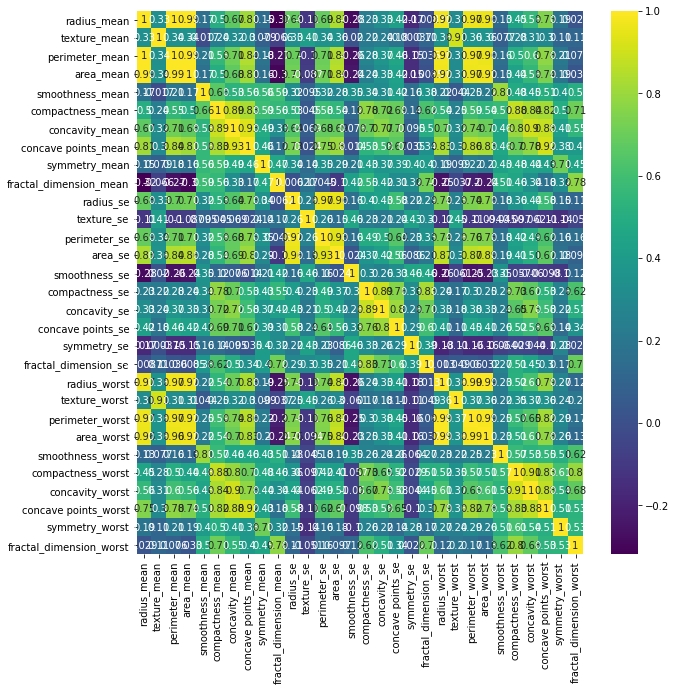

In [ ]:
corrmat = data.corr()
top_features = corrmat.index
plt.figure(figsize =(10,10))
sns.heatmap(data[top_features].corr(),annot=True,cmap='viridis')


In [ ]:
def correlation(data, threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr


In [ ]:
corr_features = correlation(data,0.95)
len(set(corr_features))
corr_features 

{'area_mean',
 'area_se',
 'area_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst'}

In [ ]:
data.drop(corr_features,axis=1,inplace=True)

In [ ]:
data.shape

(569, 24)

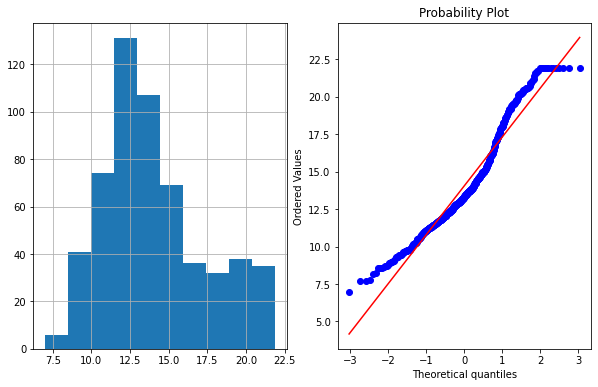

In [ ]:
def plot_data(data,features):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[features].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[features],dist='norm',plot=pylab)
  plt.show()
data['radius_mean']
plot_data(data,'radius_mean')


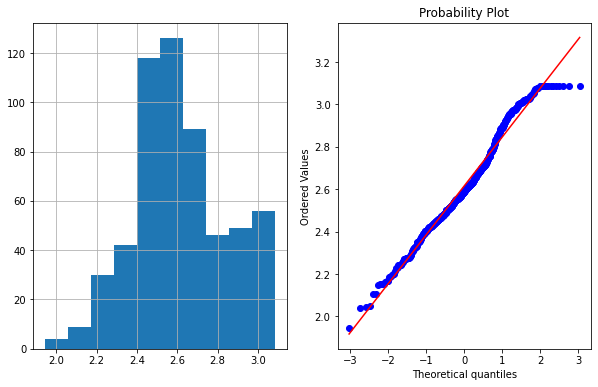

In [ ]:
data['radius_mean']=np.log(data['radius_mean'])
plot_data(data,'radius_mean')


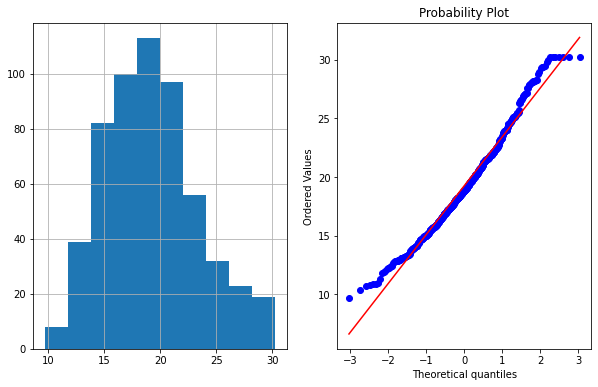

In [ ]:
plot_data(data,'texture_mean')

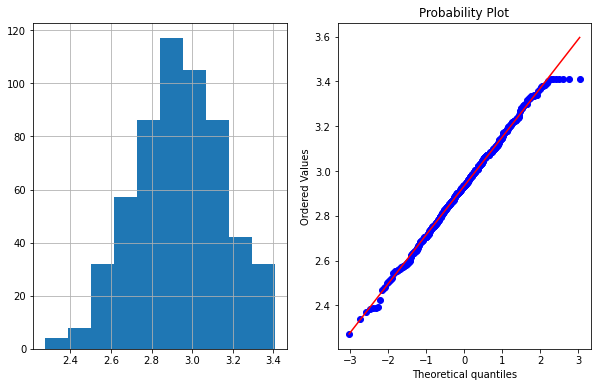

In [ ]:
data['texture_mean']=np.log(data['texture_mean'])
plot_data(data,'texture_mean')

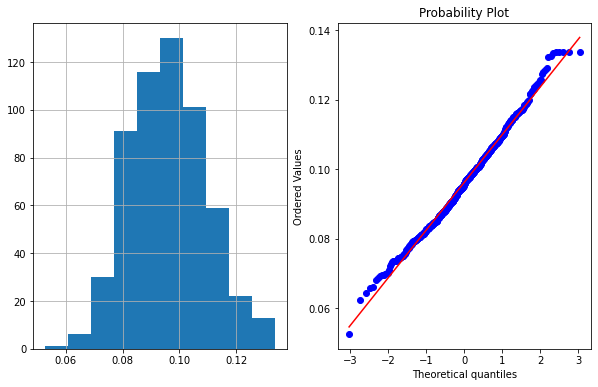

In [ ]:
plot_data(data,'smoothness_mean')

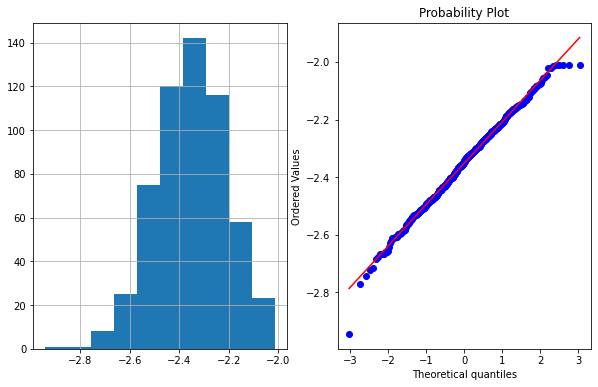

In [ ]:
data['smoothness_mean']=np.log(data['smoothness_mean'])
plot_data(data,'smoothness_mean')

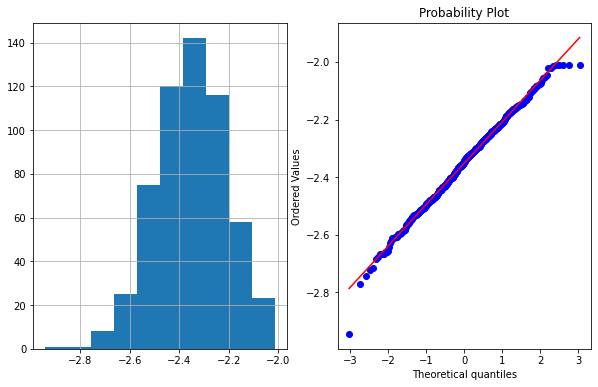

In [ ]:
plot_data(data,'smoothness_mean')

In [ ]:
data.diagnosis.dtypes

dtype('O')

In [ ]:
data['diagnosis']=data['diagnosis'].map({'B' : 0 , 'M': 1})

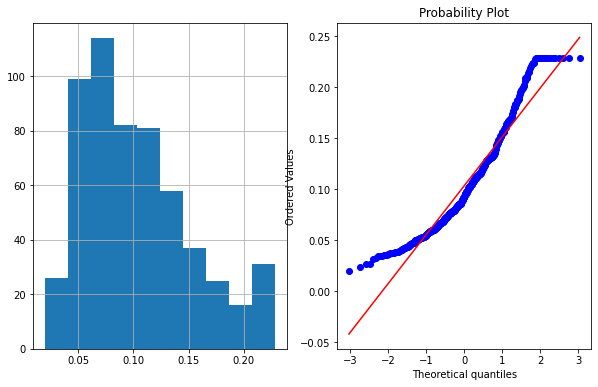

In [ ]:
plot_data(data,'compactness_mean')


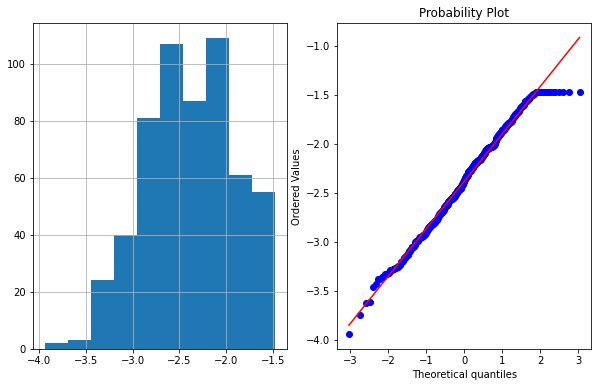

In [ ]:
data['compactness_mean']=np.log(data['compactness_mean'])
plot_data(data,'compactness_mean')

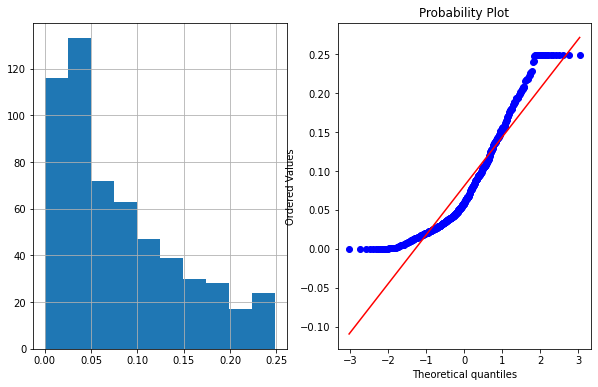

In [ ]:
data['concavity_mean']=np.log(data['concavity_mean']+1)
plot_data(data,'concavity_mean')

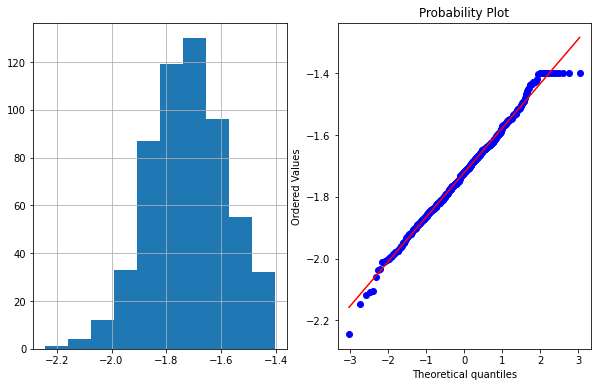

In [ ]:
data['symmetry_mean']=np.log(data['symmetry_mean'])
plot_data(data,'symmetry_mean')

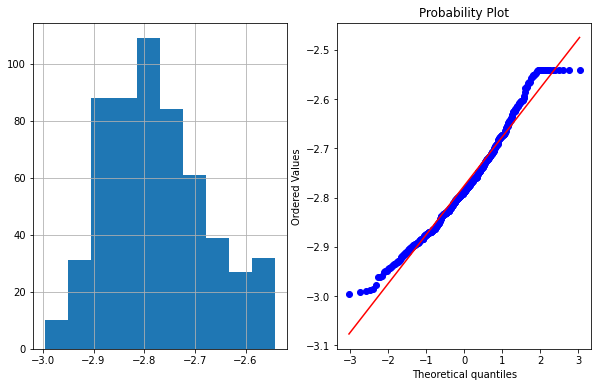

In [ ]:
data['fractal_dimension_mean']=np.log(data['fractal_dimension_mean'])
plot_data(data,'fractal_dimension_mean')


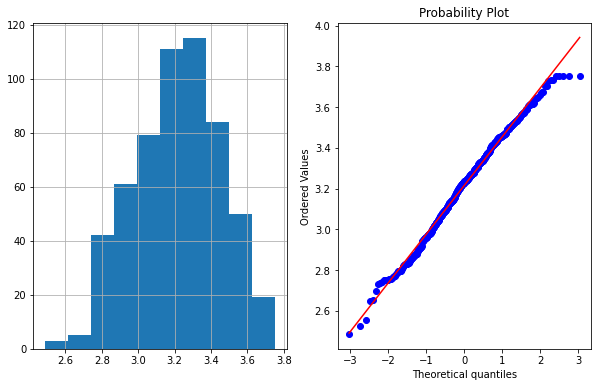

In [ ]:
data['texture_worst']=np.log(data['texture_worst'])
plot_data(data,'texture_worst')


In [ ]:
data.shape

(569, 24)

In [ ]:
x= data.drop('diagnosis',axis=1)
x

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.889816,2.339881,-2.133687,-1.475694,0.248741,0.14710,-1.419231,-2.541985,0.84865,0.90530,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,2.852439,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,3.023834,2.877512,-2.468168,-2.542875,0.083330,0.07017,-1.708154,-2.870510,0.54350,0.73390,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,3.153163,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,2.980111,3.056357,-2.210918,-1.833207,0.180153,0.12790,-1.575520,-2.813577,0.74560,0.78690,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,3.239854,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,2.435366,3.014554,-2.012194,-1.475694,0.216240,0.10520,-1.400799,-2.541477,0.49560,1.15600,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,3.277145,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,3.010128,2.663053,-2.299590,-2.018911,0.180653,0.10430,-1.709811,-2.833103,0.75720,0.78130,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,2.813611,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,3.070840,3.108614,-2.198225,-2.155028,0.218252,0.13890,-1.756779,-2.878305,0.84865,1.25600,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,3.273364,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,3.002211,3.341093,-2.324831,-2.269150,0.134531,0.09791,-1.741827,-2.894440,0.76550,2.43415,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,3.644144,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,2.809403,3.335058,-2.470412,-2.279846,0.088478,0.05302,-1.838851,-2.873869,0.45640,1.07500,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,3.529884,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,3.025291,3.378611,-2.138767,-1.475694,0.248741,0.15200,-1.428367,-2.656977,0.72600,1.59500,0.006522,0.061505,0.07117,0.01664,0.02324,0.006185,3.674273,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [ ]:
y= data['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

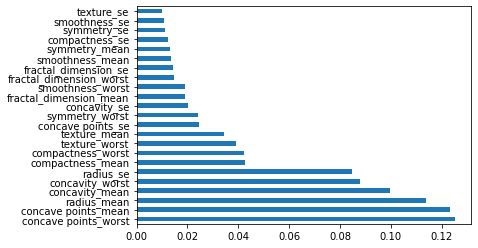

In [ ]:
model = ExtraTreesClassifier()
model.fit(x,y)
feature_selection  = model.feature_importances_

feature_importance = pd.Series(feature_selection,index=x.columns)

feature_importance.nlargest(28).plot(kind='barh')
plt.show()


In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data.head(1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,2.889816,2.339881,-2.133687,-1.475694,0.248741,0.1471,-1.419231,-2.541985,0.84865,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,2.852439,0.1622,0.62695,0.7119,0.2654,0.41915,0.1189


In [ ]:
 feature_importance 

radius_mean                0.113786
texture_mean               0.034378
smoothness_mean            0.013479
compactness_mean           0.042574
concavity_mean             0.099508
concave points_mean        0.123294
symmetry_mean              0.013247
fractal_dimension_mean     0.019090
radius_se                  0.084898
texture_se                 0.009917
smoothness_se              0.010959
compactness_se             0.012390
concavity_se               0.020265
concave points_se          0.024408
symmetry_se                0.011141
fractal_dimension_se       0.014264
texture_worst              0.039219
smoothness_worst           0.018887
compactness_worst          0.042177
concavity_worst            0.087937
concave points_worst       0.125404
symmetry_worst             0.024131
fractal_dimension_worst    0.014648
dtype: float64

In [ ]:
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

concave points_mean        0.441091
concave points_worst       0.437867
concavity_mean             0.374196
radius_mean                0.366042
concavity_worst            0.319672
radius_se                  0.244465
compactness_worst          0.223547
compactness_mean           0.212438
concavity_se               0.129538
concave points_se          0.125928
texture_worst              0.119634
smoothness_worst           0.098238
texture_mean               0.095860
symmetry_worst             0.090494
smoothness_mean            0.084791
compactness_se             0.082391
symmetry_mean              0.064790
fractal_dimension_worst    0.062847
fractal_dimension_se       0.041659
smoothness_se              0.018815
texture_se                 0.001996
fractal_dimension_mean     0.001845
symmetry_se                0.000000
dtype: float64

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
y.dtypes

dtype('int64')

In [ ]:
print(y.shape,x.shape)

(569,) (569, 23)


In [ ]:
smk = SMOTETomek(random_state=20)
X_res,Y_res = smk.fit_sample(x,y)

In [ ]:
print("Orginal data {}".format(Counter(y)))
print("Smotetomek data {}".format(Counter(Y_res)))

Orginal data Counter({0: 357, 1: 212})
Smotetomek data Counter({1: 355, 0: 355})


In [ ]:
X_res.shape,Y_res.shape

((710, 23), (710,))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res,test_size = 0.30,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((497, 23), (213, 23), (497,), (213,))

In [ ]:
logic_Reg = LogisticRegression()
logic_Reg.fit(x_train,y_train)
y_pred= logic_Reg.predict(x_test)

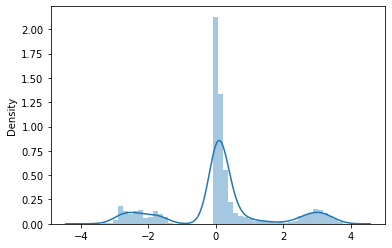

In [ ]:
sns.distplot(x_test)

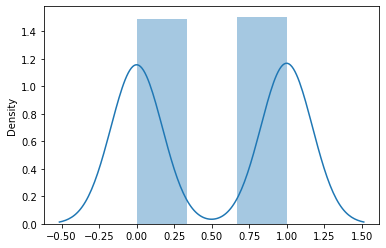

In [ ]:
sns.distplot(y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 97,   1],
       [  9, 106]])

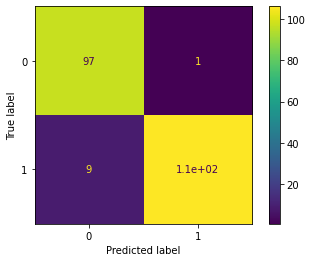

In [ ]:
plot_confusion_matrix(logic_Reg,x_test,y_test)

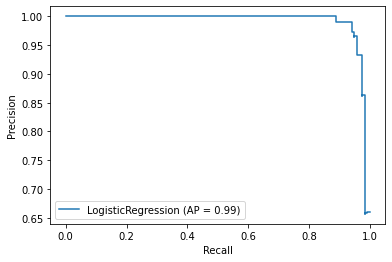

In [ ]:
plot_precision_recall_curve(logic_Reg,x_test,y_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

95.30516431924883

In [ ]:
average_precision_score(y_test,y_pred)

0.9553782671649564

In [ ]:
f1_score(y_test,y_pred)

0.954954954954955

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95        98\n           1       0.99      0.92      0.95       115\n\n    accuracy                           0.95       213\n   macro avg       0.95      0.96      0.95       213\nweighted avg       0.96      0.95      0.95       213\n'

In [ ]:
cross_val_score(logic_Reg,x,y,cv=10,scoring='accuracy').mean()*100

95.42606516290726

In [ ]:
# ridge_classifier = Ridge()

In [ ]:
# ridge_classifier.fit(x_train,y_train)

In [ ]:
# y_pred_ridge =  ridge_classifier.predict(x_test)

In [ ]:
# ridge_classifier.intercept_

In [ ]:
# mean_squared_error(y_test,y_pred)

In [ ]:
# accuracy_score(y_test,y_pred)

In [ ]:
# lasso_classifier = Lasso()
# lasso_classifier.fit(x_train,y_train)

In [ ]:
# y_pred_lasso =  lasso_classifier.predict(x_test)

In [ ]:
# lasso_classifier.intercept_

In [ ]:
ridge_classifier_new = Ridge()
parameter = {'alpha':[1e-10,1e-15,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,100]}
ridge_rigressor_new = GridSearchCV(ridge_classifier_new,parameter,scoring='neg_mean_squared_error',cv=5)

In [ ]:
ridge_rigressor_new.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-15, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 35, 40, 45, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
ridge_rigressor_new.best_params_

{'alpha': 0.001}

In [ ]:
ridge_rigressor_new.best_score_

-0.05801557657553733

In [ ]:
pred_x_test = ridge_rigressor_new.predict(x_test)

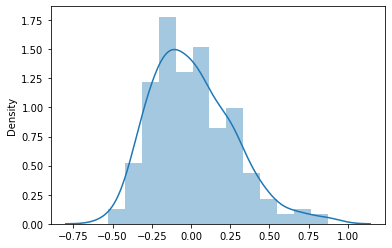

In [ ]:
sns.distplot(y_test-pred_x_test)

In [ ]:
lasso_classifier_new = Lasso()
parameter = {'alpha':[1e-10,1e-15,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,100]}
lasso_rigressor_new = GridSearchCV(lasso_classifier_new,parameter,scoring='neg_mean_squared_error',cv=5)

In [ ]:
lasso_rigressor_new.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-15, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 35, 40, 45, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_rigressor_new.best_params_

{'alpha': 1e-08}

In [ ]:
lasso_rigressor_new.best_score_

-0.05829315966656266

In [ ]:
pred_x_test_lasso = lasso_rigressor_new.predict(x_test)

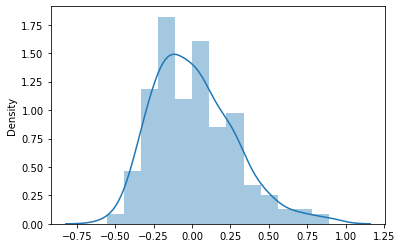

In [ ]:
sns.distplot(y_test-pred_x_test_lasso)

In [ ]:
Elastic_classifier_new = ElasticNet()
parameter = {'alpha':[1e-10,1e-15,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,100]}
elastic_rigressor_new = GridSearchCV(Elastic_classifier_new,parameter,scoring='neg_mean_squared_error',cv=5)

In [ ]:
elastic_rigressor_new.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-15, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 35, 40, 45, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
elastic_rigressor_new.best_score_

-0.058288536188802295

In [ ]:
pred_x_test_lasso = elastic_rigressor_new.predict(x_test)

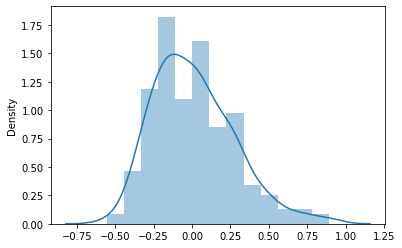

In [ ]:
sns.distplot(y_test-pred_x_test_lasso)

In [ ]:
Result = pd.DataFrame({'Actual':y_test,"predicted":y_pred})
Result

,Actual,predicted
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
208,1,1
209,1,1
210,1,1
211,1,1


In [ ]:
data.head(15)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,2.889816,2.339881,-2.133687,-1.475694,0.248741,0.14710,-1.419231,-2.541985,0.84865,0.90530,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,2.852439,0.1622,0.62695,0.7119,0.26540,0.41915,0.11890
1,1,3.023834,2.877512,-2.468168,-2.542875,0.083330,0.07017,-1.708154,-2.870510,0.54350,0.73390,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,3.153163,0.1238,0.18660,0.2416,0.18600,0.27500,0.08902
2,1,2.980111,3.056357,-2.210918,-1.833207,0.180153,0.12790,-1.575520,-2.813577,0.74560,0.78690,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,3.239854,0.1444,0.42450,0.4504,0.24300,0.36130,0.08758
3,1,2.435366,3.014554,-2.012194,-1.475694,0.216240,0.10520,-1.400799,-2.541477,0.49560,1.15600,0.009110,0.061505,0.05661,0.018670,0.03596,0.008023,3.277145,0.1901,0.62695,0.6869,0.25750,0.41915,0.12301
4,1,3.010128,2.663053,-2.299590,-2.018911,0.180653,0.10430,-1.709811,-2.833103,0.75720,0.78130,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,2.813611,0.1374,0.20500,0.4000,0.16250,0.23640,0.07678
5,1,2.521721,2.753661,-2.057289,-1.771957,0.146522,0.08089,-1.566857,-2.575313,0.33450,0.89020,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,3.167583,0.1791,0.52490,0.5355,0.17410,0.39850,0.12301
6,1,2.904165,2.994732,-2.357781,-2.216407,0.106789,0.07400,-1.718137,-2.857363,0.44670,0.77320,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,3.319987,0.1442,0.25760,0.3784,0.19320,0.30630,0.08368
7,1,2.618125,3.036394,-2.129472,-1.804845,0.089530,0.05985,-1.515948,-2.596822,0.58350,1.37700,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,3.337192,0.1654,0.36820,0.2678,0.15560,0.31960,0.11510
8,1,2.564949,3.082827,-2.061209,-1.644029,0.170502,0.09353,-1.448170,-2.605178,0.30630,1.00200,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,3.425239,0.1703,0.54010,0.5390,0.20600,0.41915,0.10720
9,1,2.522524,3.179719,-2.131999,-1.475694,0.204817,0.08543,-1.594549,-2.541477,0.29760,1.59900,0.007149,0.061505,0.07743,0.014320,0.01789,0.008023,3.705737,0.1853,0.62695,0.7855,0.22100,0.41915,0.12301


In [ ]:
logic_Reg.predict(x_test[[8]])

array([1])